**11.2 Python's datetime Object**


In [1]:
# python has a built-in datetime object 
from datetime import datetime

In [2]:
# can use datetime to get the current date and time
now = datetime.now()
print(now)

2019-11-20 20:38:17.054751


In [3]:
# can also create the datetime manually
t1 = datetime.now()
t2 = datetime(1970, 1, 1)

# and can also do datetime math
diff = t1 - t2
print(diff)

18220 days, 20:48:54.218353


In [4]:
# the type of a data calculation is called a timedelta
print(type(diff))

<class 'datetime.timedelta'>


**11.3 Converting to datetime**
+ this is done with a 'to_datatime' function


In [5]:
import pandas as pd
ebola = pd.read_csv('/Users/BrendanErhard/Desktop/pandas_for_everyone-master/data/country_timeseries.csv')

# top left corner of the data
print(ebola.iloc[:5, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           NaN         8157.0                NaN
4  12/31/2014  284        2730.0         8115.0             9633.0


In [6]:
# the first Date column contains data info, but using an info attribute will tell it is encoded as a string object
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB
None


In [7]:
# can create a new column, date_dt, that converts the Date column, into datetime
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [8]:
# can be more specific about how to convert data into a datetime object
# the to_datetime function has a parameter called 'format' that allows to manually specify the format
# since the date is a month/day/year format, can pass in %m/%d/%Y

ebola['date_dt'] = pd.to_datetime(ebola['Date'], format='%m/%d/%Y')
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(16), int64(1), object(1)
memory usag

In [9]:
# the 'to_datetime' function has built-in options
# example, can set the dayfirst and yearfirst options to True
# can also manually specify how they are represented using syntax specifid by 'strptime'


**11.4 Loading Data that Include Dates**
+ the read_csv function has a lot of parameters
 + parse_dates, inner_datetime_format, keep_date_col, date_parser, and dayfirst

In [10]:
ebola = pd.read_csv('/Users/BrendanErhard/Desktop/pandas_for_everyone-master/data/country_timeseries.csv', 
                    parse_dates=[0])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.2 KB
None


In [11]:
# this shows how can automatically covnert columns into dates directly when the dats is loaded

**11.5 Extracting Date Components**
+ now that have a datetime object, can extract various parts of the data - such as year, month, or day

In [12]:
d = pd.to_datetime('2016-02-29')
print(d)

2016-02-29 00:00:00


In [13]:
# if pass in a single string, get a Timestamp
print(type(d))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [14]:
# now that have a proper datetime, can access various date components as attributes
print(d.year)

2016


In [15]:
print(d.month)

2


In [16]:
print(d.day)

29


In [17]:
# can use the 'dt accessor' to parse out items of the data
ebola['date_dt'] = pd.to_datetime(ebola['Date'])


In [18]:
print(ebola[['Date', 'date_dt']].head())

        Date    date_dt
0 2015-01-05 2015-01-05
1 2015-01-04 2015-01-04
2 2015-01-03 2015-01-03
3 2015-01-02 2015-01-02
4 2014-12-31 2014-12-31


In [19]:
# can create a new year column based on the Date column
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

        Date    date_dt  year
0 2015-01-05 2015-01-05  2015
1 2015-01-04 2015-01-04  2015
2 2015-01-03 2015-01-03  2015
3 2015-01-02 2015-01-02  2015
4 2014-12-31 2014-12-31  2014


In [20]:
# let's finish parsing the data
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month,
                               ebola['date_dt'].dt.day)
print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

        Date    date_dt  year  month  day
0 2015-01-05 2015-01-05  2015      1    5
1 2015-01-04 2015-01-04  2015      1    4
2 2015-01-03 2015-01-03  2015      1    3
3 2015-01-02 2015-01-02  2015      1    2
4 2014-12-31 2014-12-31  2014     12   31


In [21]:
# but, when pased out for dates, the data type was not preserved
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
year                   122 non-null int64
month                

**11.6 Date Calculations and Timedeltas**
+ with date oas objects, better able to do date calculations


In [22]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [23]:
# to figure out how many days since a reference date
print(ebola['date_dt'].min())

2014-03-22 00:00:00


In [24]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

        Date  Day outbreak_d
0 2015-01-05  289   289 days
1 2015-01-04  288   288 days
2 2015-01-03  287   287 days
3 2015-01-02  286   286 days
4 2014-12-31  284   284 days


In [26]:
print(ebola[['Date', 'Day', 'outbreak_d']].tail())

          Date  Day outbreak_d
117 2014-03-27    5     5 days
118 2014-03-26    4     4 days
119 2014-03-25    3     3 days
120 2014-03-24    2     2 days
121 2014-03-22    0     0 days


In [27]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 23 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
year                   122 non-null int64
month                

**11.7 Datetime Methods**


In [28]:
banks = pd.read_csv('/Users/BrendanErhard/Desktop/pandas_for_everyone-master/data/banklist.csv')
print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
1  30003  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
2  58302                         Whitney Bank    28-Apr-17    26-Jul-17  
3  35495                    Cache Valley Bank     3-Mar-17    18-May-17  
4  19328                  State Bank of Texas    27-Jan-17    18-May-17  


In [29]:
# can input the data with the dates directly parsed
banks = pd.read_csv('/Users/BrendanErhard/Desktop/pandas_for_everyone-master/data/banklist.csv', parse_dates=[5, 6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
Bank Name                553 non-null object
City                     553 non-null object
ST                       553 non-null object
CERT                     553 non-null int64
Acquiring Institution    553 non-null object
Closing Date             553 non-null datetime64[ns]
Updated Date             553 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.3+ KB
None


In [30]:
# can parse the date by obtaining the quarter and year in which the bank closed
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter,
                                                  banks['Closing Date'].dt.year)

In [31]:
# can calculate how many banks closed in each quarter of each year
closing_year = banks.groupby(['closing_year']).size()

In [32]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()


In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

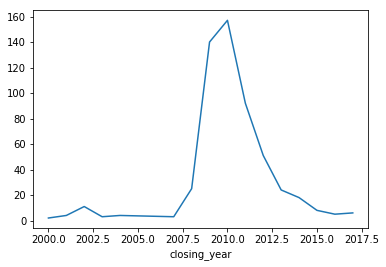

In [34]:
ax = closing_year.plot()
plt.show()

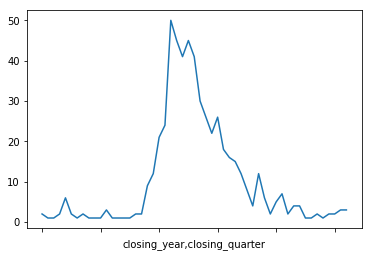

In [35]:
fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

**11.8 Getting stock data**

In [37]:
# can install and use the pandas_datafreader
# to get data from the internet

import pandas_datareader as pdr


ModuleNotFoundError: No module named 'pandas_datareader'

In [38]:
tesla = pd.read_csv('/Users/BrendanErhard/Desktop/pandas_for_everyone-master/data/tesla_stock_yahoo.csv', parse_dates=[0])
print(tesla.head())

        Date       Open   High        Low      Close  Adj Close    Volume
0 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2 2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3 2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4 2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [39]:
tesla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1786,2017-08-02,318.940002,327.119995,311.220001,325.890015,325.890015,13091500
1787,2017-08-03,345.329987,350.000000,343.149994,347.089996,347.089996,13535000
1788,2017-08-04,347.000000,357.269989,343.299988,356.910004,356.910004,9198400
1789,2017-08-07,357.350006,359.480011,352.750000,355.170013,355.170013,6276900
1790,2017-08-08,357.529999,368.579987,357.399994,365.220001,365.220001,7449837


**11.9 Subsetting Data based on Dates**

In [40]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

        Date       Open   High        Low      Close  Adj Close    Volume
0 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100


**The DatetimeIndex Object**
+ when working with the datetime data, often need to set the datetime object = dataframe's index


In [41]:
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
               '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-07', '2017-08-08'],
              dtype='datetime64[ns]', name='Date', length=1791, freq=None)


In [42]:
# with the index set as a date object, can now use the date directly to subset rows
print(tesla['2015'].iloc[:5, :5])

                 Date        Open        High         Low       Close
Date                                                                 
2015-01-02 2015-01-02  222.869995  223.250000  213.259995  219.309998
2015-01-05 2015-01-05  214.550003  216.500000  207.160004  210.089996
2015-01-06 2015-01-06  210.059998  214.199997  204.210007  211.279999
2015-01-07 2015-01-07  213.350006  214.779999  209.779999  210.949997
2015-01-08 2015-01-08  212.809998  213.800003  210.009995  210.619995


In [43]:
# can also subset the data based on year and month
print(tesla['2010-06'].iloc[:, :5])

                 Date       Open   High        Low      Close
Date                                                         
2010-06-29 2010-06-29  19.000000  25.00  17.540001  23.889999
2010-06-30 2010-06-30  25.790001  30.42  23.299999  23.830000


**11.9.2 The TimedeltaIndex Object**


In [44]:
# let's create a timedelta
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()


In [46]:
# now assign the timedelta to the index
tesla.index = tesla['ref_date']
print(tesla.iloc[:5, :5])

               Date       Open   High        Low      Close
ref_date                                                   
0 days   2010-06-29  19.000000  25.00  17.540001  23.889999
1 days   2010-06-30  25.790001  30.42  23.299999  23.830000
2 days   2010-07-01  25.000000  25.92  20.270000  21.959999
3 days   2010-07-02  23.000000  23.10  18.709999  19.200001
7 days   2010-07-06  20.000000  20.00  15.830000  16.110001


In [53]:
# can now select the data based on these deltas
print(tesla['0 day': '5 day'].iloc[:5, :5])

               Date       Open   High        Low      Close
ref_date                                                   
0 days   2010-06-29  19.000000  25.00  17.540001  23.889999
1 days   2010-06-30  25.790001  30.42  23.299999  23.830000
2 days   2010-07-01  25.000000  25.92  20.270000  21.959999
3 days   2010-07-02  23.000000  23.10  18.709999  19.200001


**11.10 Date Ranges**
+ not every data set will have a fixed frequency of values

In [54]:
ebola = pd.read_csv('/Users/BrendanErhard/Desktop/pandas_for_everyone-master/data/country_timeseries.csv', parse_dates=[0])

In [55]:
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [60]:
# it's common practice to create a date range to reindex a data set
# can use the date_range function
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [61]:
# will just work with first 5 rows in this example
ebola_5 = ebola.head()

# if wanted to set this data range as index, need to set the date as the index
ebola_5.index = ebola_5['Date']

In [63]:
# next can re-index the data
ebola_5.reindex(head_range)
print(ebola_5.iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


**Frequencies**
+ values can be passed into the freq parameter when calling date_range

In [64]:
# business days during the week of Jan 1, 2017
print(pd.date_range('2017-01-01', '2017-01-07', freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


**Offsets**
+ offsets are a variation on a base frequency
+ ex, can collect data from 'every other business day'

In [65]:
# every other business day during the week of Jan 1, 2017
print(pd.date_range('2017-01-01', '2017-01-07', freq='2B'))

DatetimeIndex(['2017-01-02', '2017-01-04', '2017-01-06'], dtype='datetime64[ns]', freq='2B')


In [66]:
# can also specify the 1st Thursday of each month in 2017
print(pd.date_range('2017-01-01', '2017-12-31',freq='WOM-1THU'))

DatetimeIndex(['2017-01-05', '2017-02-02', '2017-03-02', '2017-04-06',
               '2017-05-04', '2017-06-01', '2017-07-06', '2017-08-03',
               '2017-09-07', '2017-10-05', '2017-11-02', '2017-12-07'],
              dtype='datetime64[ns]', freq='WOM-1THU')


In [68]:
# can also specify the 3rd Friday of each month
print(pd.date_range('2017-01-01','2017-12-31', freq='WOM-3FRI'))

DatetimeIndex(['2017-01-20', '2017-02-17', '2017-03-17', '2017-04-21',
               '2017-05-19', '2017-06-16', '2017-07-21', '2017-08-18',
               '2017-09-15', '2017-10-20', '2017-11-17', '2017-12-15'],
              dtype='datetime64[ns]', freq='WOM-3FRI')


**Shifting Values**


In [71]:
import matplotlib.pyplot as plt
ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

ValueError: view limit minimum -36780.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x114714730> (for post_execute):


ValueError: view limit minimum -36780.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36780.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [73]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [74]:
# start off with a fresh dataset
ebola = pd.read_csv('/Users/BrendanErhard/Desktop/pandas_for_everyone-master/data/country_timeseries.csv',
                   index_col='Date',
                   parse_dates=['Date'])
print(ebola.head().iloc[:, :4])

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                           
2015-01-05  289        2776.0            NaN            10030.0
2015-01-04  288        2775.0            NaN             9780.0
2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02  286           NaN         8157.0                NaN
2014-12-31  284        2730.0         8115.0             9633.0


In [75]:
# need to create a data range to fill in all missing dates in the data
# then shift the date values downward
new_idx = pd.date_range(ebola.index.min(),ebola.index.max())

In [76]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [77]:
# now revrs the order of the index
new_idx = reversed(new_idx)

In [79]:
# now reindex data - to create rows of NaN if index does not exist
ebola = ebola.reindex(new_idx)

In [80]:
print(ebola.head().iloc[:, :4])

              Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                             
2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01    NaN           NaN            NaN                NaN


In [81]:
print(ebola.tail().iloc[:, :4])

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                           
2014-03-26  4.0          86.0            NaN                NaN
2014-03-25  3.0          86.0            NaN                NaN
2014-03-24  2.0          86.0            NaN                NaN
2014-03-23  NaN           NaN            NaN                NaN
2014-03-22  0.0          49.0            NaN                NaN


In [82]:
# next step is to calculate the difference between earliest date in data set, and earliest valid date in each column
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [83]:
# now want to get the earliest data in our data set
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [84]:
# then subtract this from each of last_valid dates
shift_values = last_valid - earliest_date
print(shift_values)

Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [85]:
# can iterate through each column, using the shift method
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

In [86]:
ebola_shift = pd.DataFrame(ebola_dict)

In [87]:
ebola_shift = ebola_shift[ebola.columns]
print(ebola_shift.tail())

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                              
2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23  NaN           NaN            3.0                2.0   
2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN          NaN   
2014-03-22            0.0            1.0                 1.0        

In [88]:
# can then remove indices and assign to Day
ebola_shift.index = ebola_shift['Day']
ebola_shift =ebola_shift.drop(['Day'], axis=1)
print(ebola_shift.tail())

      Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                   
 4.0          86.0            8.0                2.0            1.0   
 3.0          86.0            NaN                NaN            NaN   
 2.0          86.0            7.0                NaN            NaN   
NaN            NaN            3.0                2.0            NaN   
 0.0          49.0            8.0                6.0            0.0   

      Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                                
 4.0            NaN                 1.0          1.0         NaN   
 3.0            NaN                 NaN          NaN         NaN   
 2.0            NaN                 NaN          NaN         NaN   
NaN             NaN                 NaN          NaN         NaN   
 0.0            1.0                 1.0          1.0         1.0   

      Deaths_Guinea  Deat

**11.12 Resampling**
+ Resampling converts a datetime from 1 frequency to another

In [89]:
# downsample daily values to monthly values
# since we have multiple values, need to aggregate the results
# here will use the man
down = ebola.resample('M').mean()
print(down.iloc[:5, :5])

                   Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                     
2014-03-31    4.500000     94.500000       6.500000           3.333333   
2014-04-30   24.333333    177.818182      24.555556           2.200000   
2014-05-31   51.888889    248.777778      12.555556           7.333333   
2014-06-30   84.636364    373.428571      35.500000         125.571429   
2014-07-31  115.700000    423.000000     212.300000         420.500000   

            Cases_Nigeria  
Date                       
2014-03-31            NaN  
2014-04-30            NaN  
2014-05-31            NaN  
2014-06-30            NaN  
2014-07-31       1.333333  


In [90]:
# here we will unsample the down-sampled value
# notice how missing dates are populated
# but they are filled in with missing values
up = down.resample('D').mean()
print(up.iloc[:5, :5])

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria
Date                                                                          
2014-03-31  4.5          94.5            6.5           3.333333            NaN
2014-04-01  NaN           NaN            NaN                NaN            NaN
2014-04-02  NaN           NaN            NaN                NaN            NaN
2014-04-03  NaN           NaN            NaN                NaN            NaN
2014-04-04  NaN           NaN            NaN                NaN            NaN


**Timezones**

In [91]:
import pytz

In [92]:
print(len(pytz.all_timezones))

591


In [94]:
# here are the US timezones
import re
regex =re.compile(r'^US')
selected_files = filter(regex.search, pytz.common_timezones)
print(list(selected_files))

['US/Alaska', 'US/Arizona', 'US/Central', 'US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific']


In [95]:
# let's imagine a flight between JFK and LAX that leaves at 7AM from NYC and landed at 9:57 AM LAX
# TAM Eastern
depart = pd.Timestamp('2017-08-29 07:00', tz='US/Eastern')
print(depart)

2017-08-29 07:00:00-04:00


In [96]:
# another way is to use the tz_localize method
arrive = pd.Timestamp('2017-08-29 09:57')
print(arrive)

2017-08-29 09:57:00


In [97]:
arrive = arrive.tz_localize('US/Pacific')
print(arrive)

2017-08-29 09:57:00-07:00


In [98]:
# can convert the arrival time back to the Eastern time sozne
print(arrive.tz_convert('US/Eastern'))

2017-08-29 12:57:00-04:00


In [99]:
# can also perform operations on time zones
# below will look at difference between times for flight duration
duration = arrive - depart

TypeError: Timestamp subtraction must have the same timezones or no timezones

In [100]:
# must have the same time zones to perform calculations


In [101]:
# get the flight duration
duration = arrive.tz_convert('US/Eastern') - depart
print(duration)

0 days 05:57:00
